In [2]:
!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/kaxiti/.local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/kaxiti/.local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/home/kaxiti/.local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/home/kaxiti/.local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/kaxiti/.local/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/home/kaxiti/.local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 12

In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.types as t
import pyspark.sql.functions as f

In [4]:
df = pd.read_csv('/home/kaxiti/Uni/bigdata/charts.csv')

In [5]:
df

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


## epipleon column gia xristikes ymerominies

In [11]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [12]:
totalSum=df.groupby(['year','region'])['streams'].sum()
topArtist=df.groupby(['year','artist'])['streams'].sum()
topArtistPerYear=df.groupby(['year','region','artist'])['streams'].sum()


In [13]:
df

,title,rank,date,artist,url,region,chart,trend,streams,year,month
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,2017,1
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0,2017,1
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,2017,1
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0,2017,1
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN,2021,7
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN,2021,7
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN,2021,7
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN,2021,7


# Όλες οι χώρες

In [6]:
print(df['region'].unique())

['Argentina' 'Australia' 'Brazil' 'Austria' 'Belgium' 'Colombia' 'Bolivia'
 'Denmark' 'Bulgaria' 'Canada' 'Chile' 'Costa Rica' 'Czech Republic'
 'Finland' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'France'
 'Germany' 'Global' 'Greece' 'Guatemala' 'Honduras' 'Hong Kong' 'Hungary'
 'Iceland' 'Indonesia' 'Ireland' 'Italy' 'Japan' 'Latvia' 'Lithuania'
 'Malaysia' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Norway' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Singapore' 'Spain' 'Slovakia' 'Sweden' 'Taiwan' 'Switzerland' 'Turkey'
 'United Kingdom' 'United States' 'Uruguay' 'Thailand' 'Andorra' 'Romania'
 'Vietnam' 'Egypt' 'India' 'Israel' 'Morocco' 'Saudi Arabia'
 'South Africa' 'United Arab Emirates' 'Russia' 'Ukraine' 'South Korea']


# word cloud visualisation των χωρών αναλογα με τα streams τους

In [15]:
def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=150, min_font_size=30, colormap='tab20b', background_color='white', 
                   prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [16]:
counts = df['region'].value_counts()

In [9]:
counts.head(10)

Argentina         455308
United States     455057
Austria           454593
Brazil            454439
Australia         453103
Canada            452279
Global            451793
United Kingdom    450721
Switzerland       449611
Philippines       449335
Name: region, dtype: int64

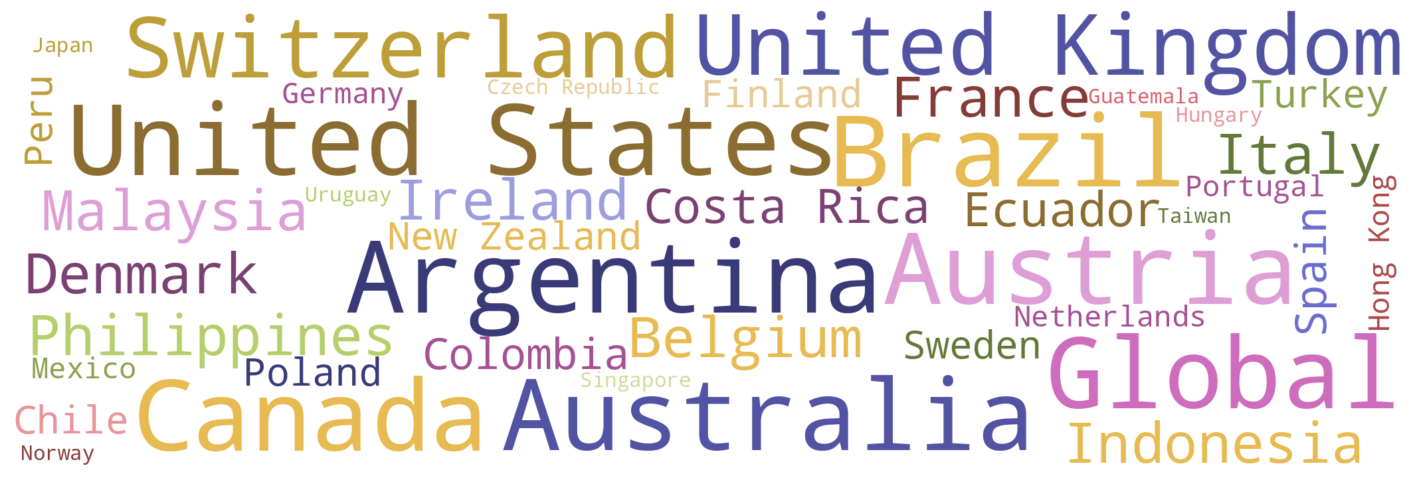

In [10]:
visualize_word_counts(counts)

# streams by region


In [19]:
# compute total streams by region
streams = df.groupby('region')['streams'].sum().reset_index()

# compute percent stream
streams['percent_streams'] = streams['streams']/streams['streams'].sum()

# rename regions with very little streams (< .01 %) as 'Other'
streams['region'] = streams.apply(lambda x: x['region'] if x['percent_streams'] >= .01 else 'Other', axis=1)

# we need another groupby because there are multiple regions with name 'Other'
streams = streams.groupby('region')['percent_streams'].sum().reset_index().round(3).sort_values(by='percent_streams')

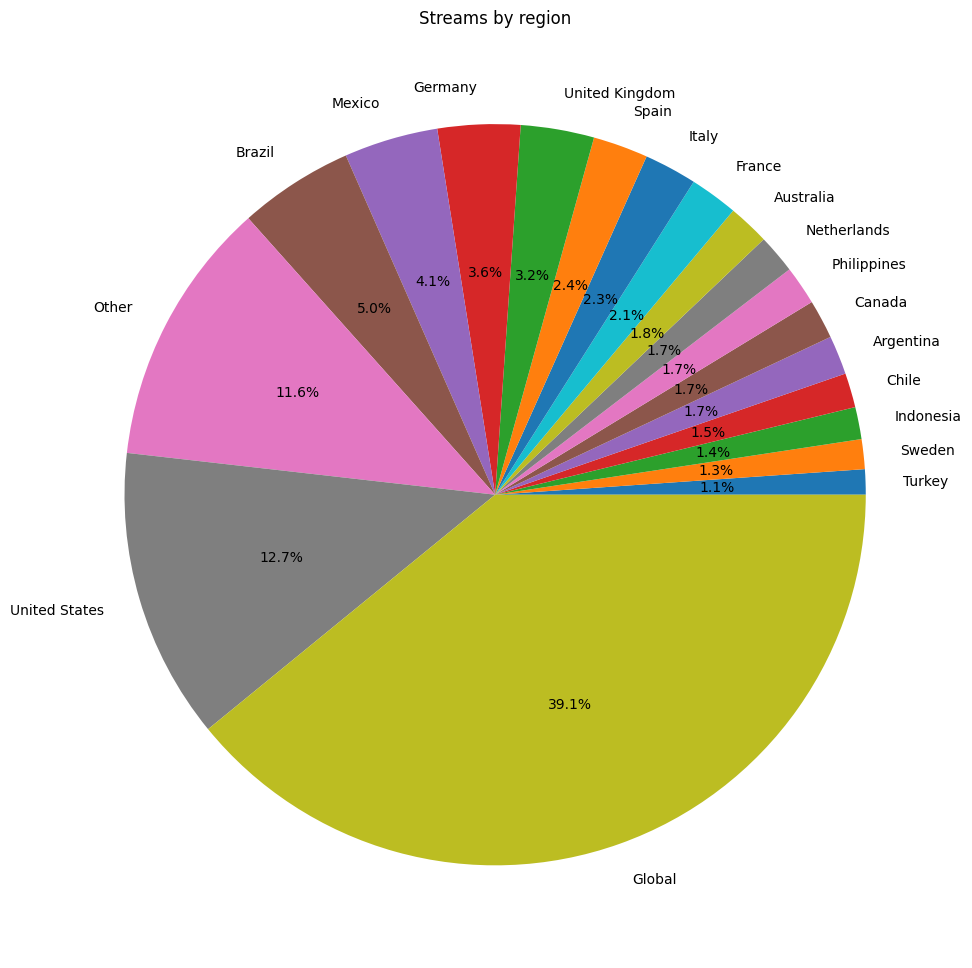

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(x=streams['percent_streams'], labels=streams['region'], autopct='%.1f%%')
ax.set_title('Streams by region')
plt.tight_layout()


# SQL με spark

In [21]:
spark = (SparkSession.builder.config("spark.driver.memory","4g").config("spark.driver.maxResultSize", "4g").getOrCreate())

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/05 20:43:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [22]:
df = spark.read.csv(path='/home/kaxiti/Uni/bigdata/charts.csv', inferSchema=True, header=True)

In [23]:
df = df.withColumn("rank", f.col("rank").cast(t.LongType())).withColumn("date", f.col("date").cast(t.DateType())).withColumn("streams", f.col("streams").cast(t.IntegerType()))

In [24]:
df

DataFrame[title: string, rank: bigint, date: date, artist: string, url: string, region: string, chart: string, trend: string, streams: int]


To perform analysis, we will be using spark sql library. For that, we create a temp table.

The reason to use the registerTempTable( tableName ) method for a DataFrame, is so that in addition to being able to use the Spark-provided methods of a DataFrame.

Using this, we can also issue SQL queries via the sqlContext. sql( sqlQuery ) method, that use that DataFrame as an SQL table.


In [25]:
df.registerTempTable("charts")

/home/kaxiti/.local/lib/python3.10/site-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
#the range of timeline of the data
spark.sql('''SELECT MIN(date) begin, MAX(date) end FROM charts WHERE chart = 'top200';''').toPandas()

In [53]:
# top 10 t HGE
spark.sql('''
SELECT title, SUM(streams) streams
FROM charts 
WHERE artist LIKE '%HGEMONA$%' 
AND streams IS NOT NULL 
GROUP BY title 
ORDER BY streams DESC 
LIMIT 10;''').toPandas().head(11)

,title,streams
0,Badman,1061539
1,Too Deep,643180
2,PLATA O PLOMO,531064
3,Pasa Stin Pasa,400056
4,Psycho,274634
5,SEVASMOS,258581
6,Dope Sport,83220
7,Get Away,72604
8,Plan Out,66516
9,Hot Box,59542


In [46]:
spark.sql('''
SELECT title, date, streams 
FROM charts 
WHERE artist LIKE '%Mad Clip%' 
AND date LIKE '%2021-09-01%'
AND chart='top200'
ORDER BY rank ASC;''').toPandas().head(21)


,title,date,streams
0,Mporei,2021-09-01,18413
1,Shorty,2021-09-01,13648
2,Fimi,2021-09-01,10567
3,XILIOMETRA,2021-09-01,8989
4,Lil Star,2021-09-01,7052
5,Baby,2021-09-01,7007
6,Mia Zoi,2021-09-01,5936
7,Filakes,2021-09-01,5616
8,Kotera,2021-09-01,5223
9,Bonnie & Clyde,2021-09-01,5050


In [47]:
spark.sql('''
SELECT title, date, streams 
FROM charts 
WHERE artist LIKE '%Mad Clip%' 
AND date LIKE '%2021-09-02%'
AND chart='top200'
ORDER BY rank ASC;''').toPandas().head(21)

,title,date,streams
0,Guccci,2021-09-02,110942
1,Mporei,2021-09-02,62953
2,XILIOMETRA,2021-09-02,58502
3,Elpida,2021-09-02,49721
4,Baby,2021-09-02,45801
5,Fimi,2021-09-02,42465
6,Shorty,2021-09-02,36896
7,Kotera,2021-09-02,36047
8,Filakes,2021-09-02,24462
9,Montecristo,2021-09-02,23236
